In [19]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

##Dataset
 data from the Behavioral Risk Factor Surveillance Survey, or BRFSS, which is run by the Centers for Disease Control. The survey includes more than 400,000 respondents, but to keep things manageable, we'll use a random subsample of 100,000.

##Exploring relationships

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom
from scipy.stats import linregress


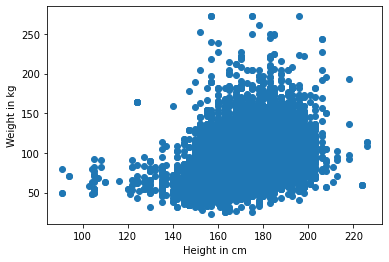

In [21]:
#For VS code path
brfss = pd.read_hdf(r'D:\sem 2 year 3\DataCamp\Dataset\New folder\Google_Colab_DataCamp_Data_Analyst\Dataset_Exploratory Data Analysis in Python\brfss.hdf5', 'brfss')

#For GG colab gg drive path
#brfss = pd.read_hdf(r'/content/drive/MyDrive/DataCamp and Linkedin Learning/CAREER TRACK Data Analyst with Python/Dataset/Exploratory Data Analysis in Python/brfss.hdf5', 'brfss')


height = brfss['HTM4']
weight = brfss['WTKG3']
plt.plot(height, weight, 'o') #Plot a cricle for each datapoint
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

Transparency

Here's what it looks like with alpha=0.02. This is better, but there are so many data points, the scatter plot is still overplotted. The next step is to make the markers smaller.

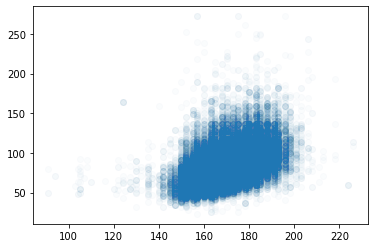

In [22]:
plt.plot(height, weight, 'o', alpha=0.02)
plt.show()

Maker size

the points fall in discrete columns. That's because most heights were reported in inches and converted to centimeters

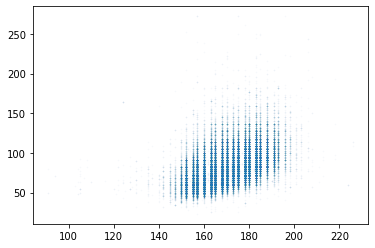

In [23]:
plt.plot(height, weight, 'o', markersize= 1, alpha=0.02)


Jittering: adding random noise to the value == filling in the values that got rounded off

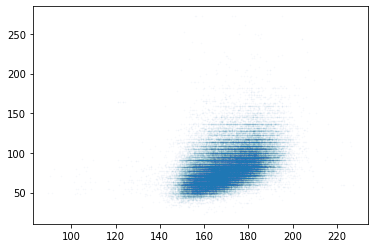

In [24]:
height_jitter = height + np.random.normal(0, 2, size = len(brfss))
plt.plot(height_jitter, weight, 'o', markersize= 1, alpha=0.02)
plt.show()

The plot column is gone but now the row is clearer because people round up their weight

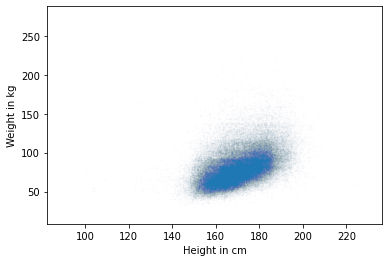

In [25]:
height_jitter = height + np.random.normal(0, 2, size = len(brfss))
weight_jitter = weight + np.random.normal(0, 2, size = len(brfss))
plt.plot(height_jitter, weight_jitter, 'o', markersize= 1, alpha=0.01)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

Zoom: zoom in where the data points are

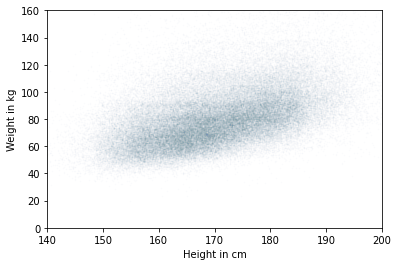

In [26]:
height_jitter = height + np.random.normal(0, 2, size = len(brfss))
weight_jitter = weight + np.random.normal(0, 2, size = len(brfss))
plt.plot(height_jitter, weight_jitter, 'o', markersize= 1, alpha=0.01)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
#zoom
plt.axis([140,200, 0, 160])
plt.show()

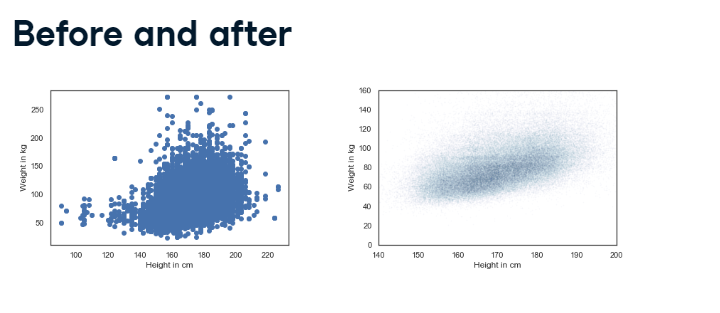

PMF of age

Do people tend to gain weight as they get older? We can answer this question by visualizing the relationship between weight and age. But before we make a scatter plot, it is a good idea to visualize distributions one variable at a time. Here, you'll visualize age using a bar chart first. Recall that all PMF objects have a .bar() method to make a bar chart.

The BRFSS dataset includes a variable, 'AGE' (note the capitalization!), which represents each respondent's age. To protect respondents' privacy, ages are rounded off into 5-year bins. 'AGE' contains the midpoint of the bins.

```
# Extract AGE
age = brfss['AGE']

# Plot the PMF
pmf_age = Pmf(age)
pmf_age.bar()

# Label the axes
plt.xlabel('Age in years')
plt.ylabel('PMF')
plt.show()
```
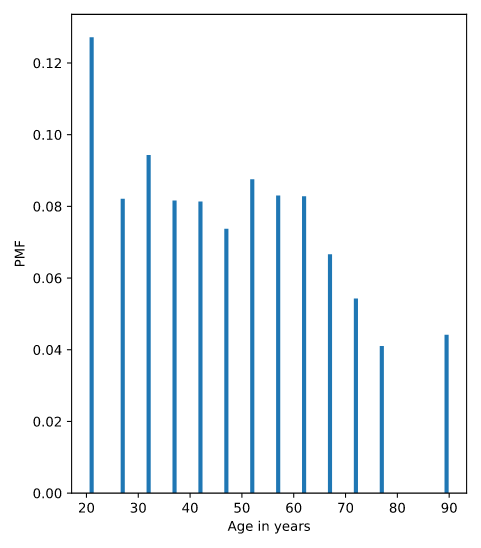

Scatter plot

Now let's make a scatterplot of weight versus age. To make the code run faster, I've selected only the first 1000 rows from the brfss DataFrame.

weight and age have already been extracted for you. Your job is to use plt.plot() to make a scatter plot.

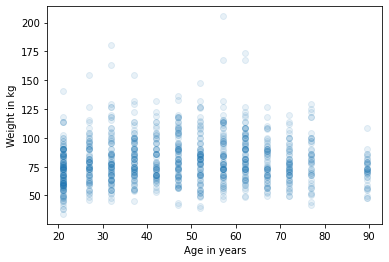

In [27]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Extract age and weight
age = brfss['AGE']
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age,weight, 'o', alpha = 0.1)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.show()

Jittering

In the previous exercise, the ages fall in columns because they've been rounded into 5-year bins. If we jitter them, the scatter plot will show the relationship more clearly. Recall how Allen jittered height and weight in the video:

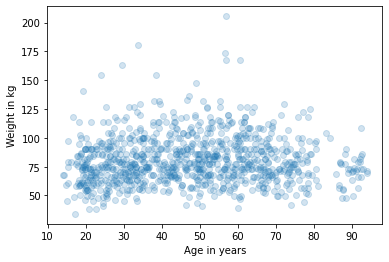

In [28]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Add jittering to age
age = brfss['AGE'] + np.random.normal(0, 2.5, size=len(brfss))
# Extract weight
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age,weight, 'o', alpha = 0.2)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

##Visualizing relationships

 other ways to visualize these relationships, including boxplots and violin plots.

Let see what it look like with more data

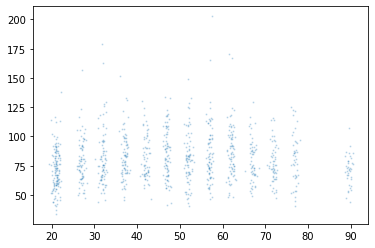

In [29]:
age = brfss['AGE'] + np.random.normal(0, 0.5, size=len(brfss)) #jitter but little
weight = brfss['WTKG3'] + np.random.normal(0, 2, size=len(brfss))
plt.plot(age, weight,'o', markersize= 1, alpha=0.2)
plt.show()

###Violin plot

but there's still space between the columns. That makes it possible to see the shape of the distribution in each age group, and the differences between groups. If we take this idea one step farther, we can use KDE to estimate the density function in each column and plot it.

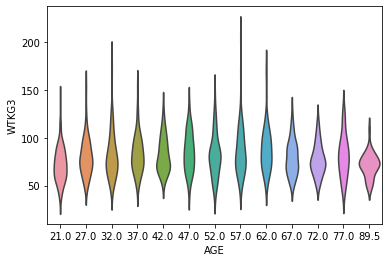

In [30]:
data = brfss.dropna(subset=['AGE', 'WTKG3'])
sns.violinplot(x='AGE', y='WTKG3', data=data, inner=None)
plt.show()

###Boxplot

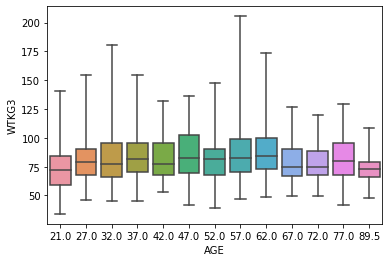

In [31]:
sns.boxplot(x = 'AGE', y = 'WTKG3', data = data, whis =10)
plt.show()

n my opinion, this plot gives us the best view of the relationship between weight and age. Looking at the medians, it seems like people in their 40s are the heaviest; younger and older people are lighter. Looking at the sizes of the boxes, it seems like people in their 40s have the most variability in weight, too. These plots also show how skewed the distribution of weight is; that is, the heaviest people are much farther from the median than the lightest people.

###Log scale

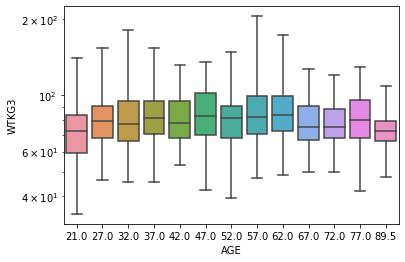

In [32]:
sns.boxplot(x = 'AGE', y = 'WTKG3', data = data, whis =10)
plt.yscale('log')
plt.show()


Fill in the parameters of .boxplot() to plot the distribution of weight ('WTKG3') in each height ('_HTMG10') group. Specify whis=10, just as was done in the video.
Add a line to plot the y-axis on a logarithmic scale.

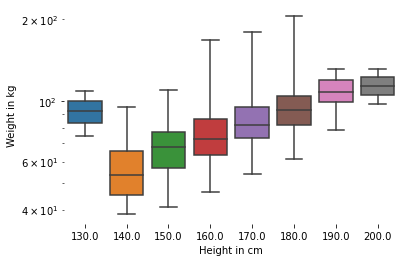

In [33]:
# Make a box plot
sns.boxplot(x ='_HTMG10',y = 'WTKG3', data = data, whis = 10 )

# Plot the y-axis on a log scale
plt.yscale('log')

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()


Income and height

Let's now use a violin plot to visualize the relationship between income and height.

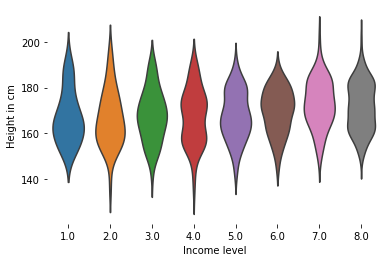

In [34]:
# Drop rows with missing data
data = brfss.dropna(subset=['INCOME2', 'HTM4'])

# Make a violin plot
sns.violinplot(x = 'INCOME2', y = 'HTM4', data = data, inner = None)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()


##Correlation

coefficient of correlation, which quantifies the strength of these relationships.

In [35]:
#For VS code path
brfss = pd.read_hdf(r'D:\sem 2 year 3\DataCamp\Dataset\New folder\Google_Colab_DataCamp_Data_Analyst\Dataset_Exploratory Data Analysis in Python\brfss.hdf5', 'brfss')

#For GG colab gg drive path
#brfss = pd.read_hdf(r'/content/drive/MyDrive/DataCamp and Linkedin Learning/CAREER TRACK Data Analyst with Python/Dataset/Exploratory Data Analysis in Python/brfss.hdf5', 'brfss')


#use all rows in this data set

columns = ['HTM4', 'WTKG3','AGE']
subset = brfss[columns]

subset.corr()

,HTM4,WTKG3,AGE
HTM4,1.000000,0.474203,-0.093684
WTKG3,0.474203,1.000000,0.021641
AGE,-0.093684,0.021641,1.000000


 0 point 47. It's positive, which means taller people are heavier, and it is moderate in strength, which means it has some predictive value

 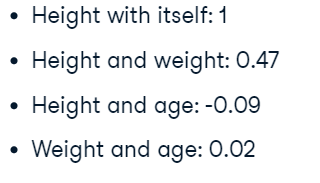

* The correlation between height and age is about -0 point 09. It's negative, which means that older people tend to be shorter, but it's weak, which means that knowing someone's age would not help much if you were trying to guess their height.
* The correlation between age and weight is even smaller. It is tempting to conclude that there is no relationship between age and weight

### But the correlation only work for linear relationship

If the relationship is nonlinear, correlation generally underestimates how strong it is.


In general, if correlation is high -- that is, close to 1 or -1, you can conclude that there is a strong linear relationship. But if correlation is close to 0, that doesn't mean there is no relationship; there might be a strong, non-linear relationship. 
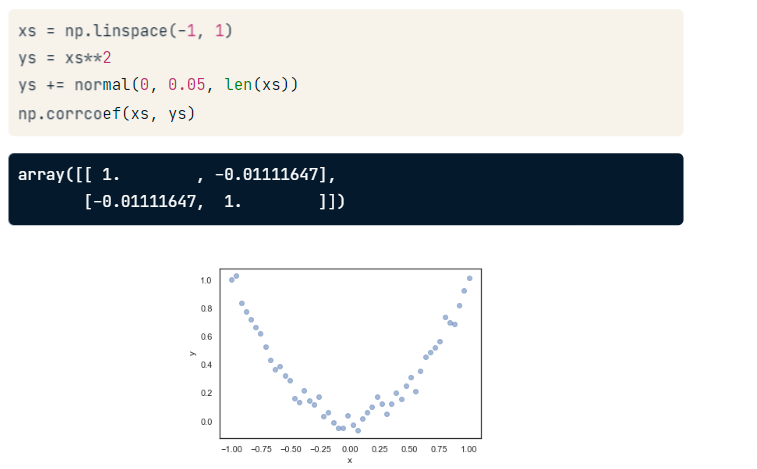

###There's another reason to be careful with correlation; it doesn't mean what people take it to mean. Specifically, correlation says nothing about slope.

trong trg hợp dưới dù cho correlation giữa 2 data trong 30 năm để xem corr của cân nặng và thời gian. Dù corr 1 > corr 2. Dữ liệu corr 2 lại thấy cân nặng tăng >10kg trong khi 1 là > 1kg trong 30 năm 
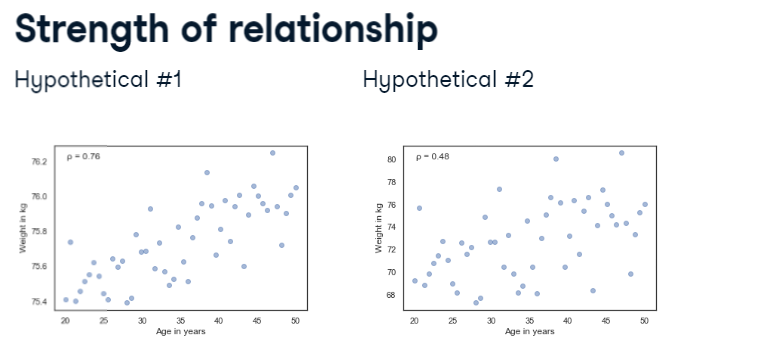

###In this scenario, the relationship on the right is probably more important, even though the correlation is lower. The statistic we really care about is the slope of the line

##Simple regression


Let's look again at an example from the previous lesson, a hypothetical relationship between weight and age. I generated two fake datasets to make a

###There's another reason to be careful with correlation; it doesn't mean what people take it to mean. Specifically, correlation says nothing about slope.

trong trg hợp dưới dù cho correlation giữa 2 data trong 30 năm để xem corr của cân nặng và thời gian. Dù corr 1 > corr 2. Dữ liệu corr 2 lại thấy cân nặng tăng >10kg trong khi 1 là > 1kg trong 30 năm 
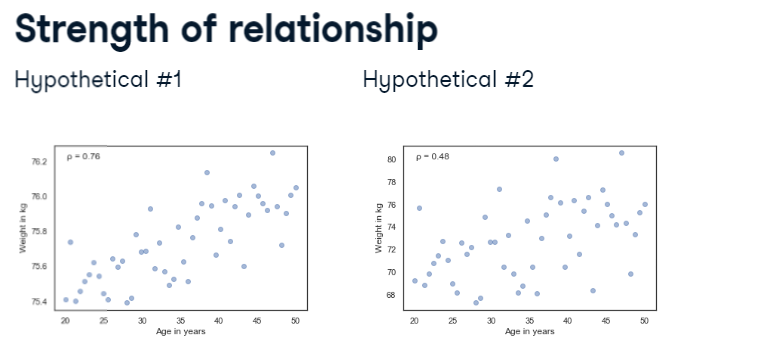

###In this scenario, the relationship on the right is probably more important, even though the correlation is lower. The statistic we really care about is the slope of the line

###Strength of relationship

```
from scipy.stats import linregress

#Hypothetical 1
res = linregress(xs, ys)

#Hypothetical 1
res = linregress(xs, ys)
```

###Regression lines

```
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope*fx
plt.plot(fx,fy, '_')
```


The visualize earlier

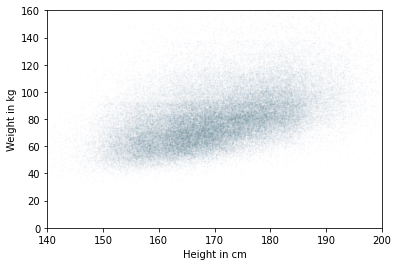

In [36]:
from scipy.stats import linregress

subset = brfss.dropna(subset=['WTKG3', 'HTM4'])

xs = subset['HTM4']
ys = subset['WTKG3']
res = linregress(xs, ys)

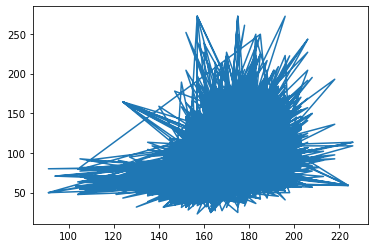

In [37]:
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope*fx
plt.plot(xs, ys, '-')